# <font size='10' color='#1ABC9C'>Assumptions For Multiple Linear Model</font>

### Our Ideal Model :- 
model_1 =smf.ols('income~creddebt+othdebt+default+homeown+address+cars+carvalue+edcat3+edcat4+edcat5',data=TrainData).fit()

    
Intercept    :- 0.42204023
    
Coefficients :- 0.02291619 0.06630575 0.00266826 0.87839246 0.00781717 0.0215593 0.02351303 0.02498615
    
Equation of Linear Regression:
    
    income = 1.8627 + credebt*0.0520 + othdebt*0.0380 - default*0.0210 + homeown*0.0297 -address*0.0014 + cars*0.0026 + carvalue * 0.0331 + edcat(level-3)*0.0202 + edcat(level-4)*0.0062 + edcat(level-5)*0.0511

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
import time
import scipy.stats as stats
import statistics

pd.pandas.set_option('display.max_columns',None)

In [2]:
X_train=pd.read_csv('X_train.csv') 
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

TrainData = pd.read_csv('trainData.csv')
model_1 =  smf.ols('income~creddebt+othdebt+default+homeown+address+cars+carvalue+edcat3+edcat4+edcat5',data=TrainData).fit()


##  Assumption for Linear Regression Model

##### Some important infromation regarding Gauss-Markov Theorem

> We say that an estimator is linear if it is a linear function of y1,....,yn.
the OLS estimators b1,b2 are linear estimators

> We say that an unbiased estimator is more efficient than another unbiased ewstimator if it has a smaller variance

> We say that an estimator is Blue (Best Linear Unbiased Estimator)  if it is linear and unbiased and more efficient than any other linear and unbiased estimator.

### The Gauss Markov theorem

a. In Linear Regrssion Model , under GM assumptions, the OLS estimators will be BLUE

b. In LRM the X variable independent/exogenous variable and error terms are homoscedastic, then OLS estimator is indeed is best one

#### 1. The Model follows a Linear RelationShip

> Testing the Assumption using Scatter Plot

Text(0.5, 1.08, 'Linearity Test')

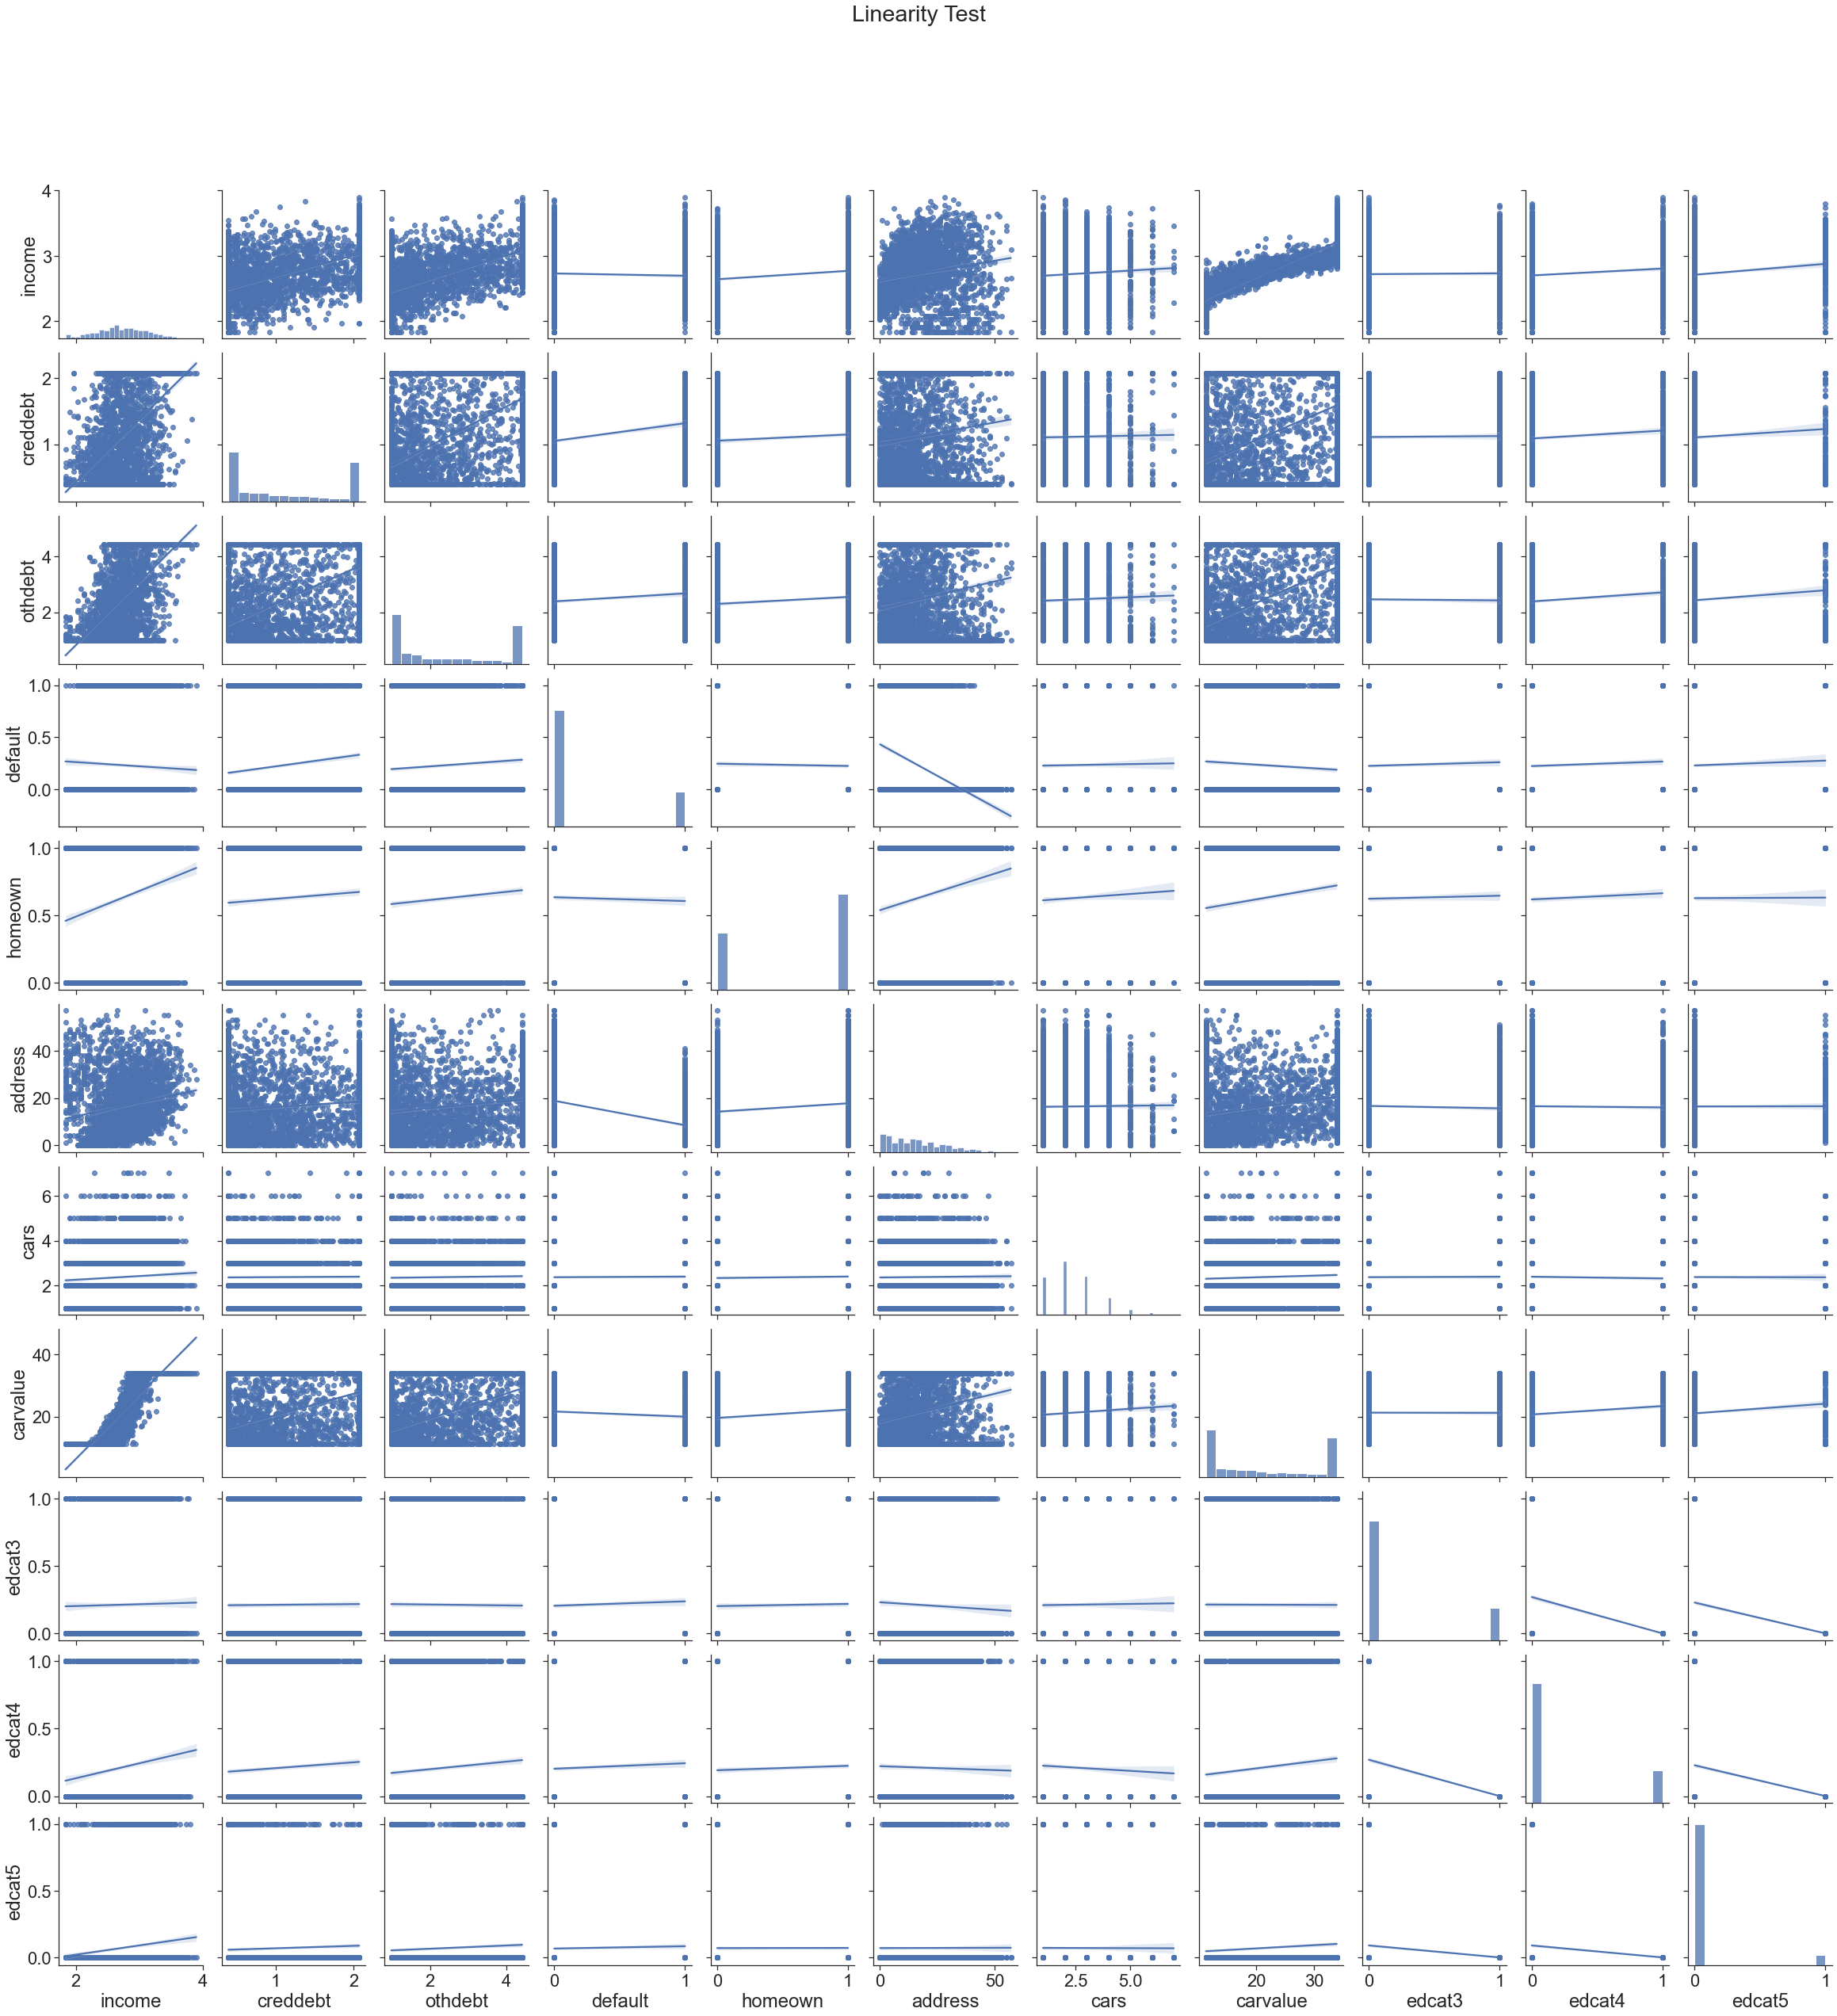

In [4]:
sns.set(style='ticks',color_codes=True , font_scale =2)
g=sns.pairplot(TrainData[['income','creddebt', 'othdebt', 'default', 'homeown', 'address', 'cars', 'carvalue', 'edcat3', 'edcat4', 'edcat5']],height=3,diag_kind='hist',kind='reg')
g.fig.suptitle('Linearity Test',y=1.08)

#### 2. data is homoscedastic
> tested with scatterplot of the residuals

C:\Users\offic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Test for Homoscedasticity')

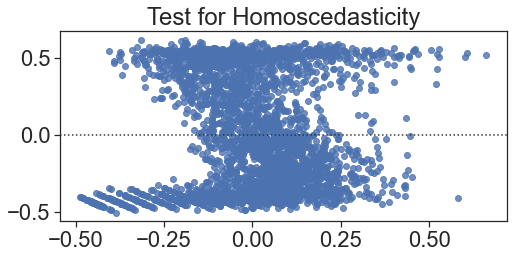

In [6]:
fig ,ax = plt.subplots(figsize=(8,3.5))
pred_val=model_1.fittedvalues.copy()
true_val=TrainData['income'].values.copy()
resid=true_val-pred_val
res=sns.residplot(resid,pred_val)
plt.title('Test for Homoscedasticity')

#### 3. Variables follow a normal Distribution
    for each value of independent variable , the dependent variable is a random variable following a normal distribution and its mean lies on the regression line


> Testing the assumption using Quantile-Quantile plot (Q-Q plot)

<function matplotlib.pyplot.show(close=None, block=None)>

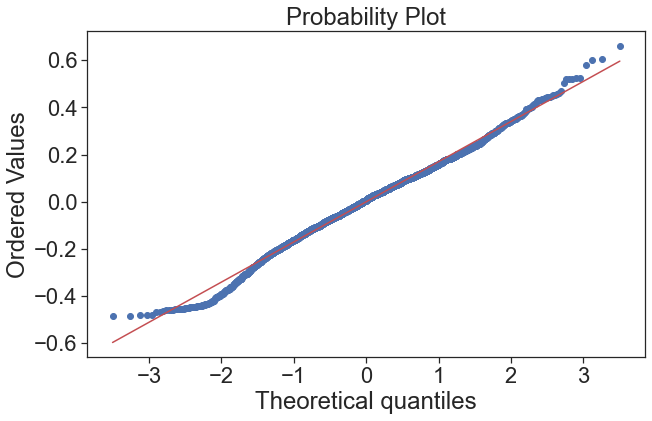

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
stats.probplot(resid,dist='norm',plot=plt)
plt.show

#### 4. little or no multicollinearity
If independent variables are highly correlated , they are no longer independent.


> Correlation >=0.8 , the assumption is broken 

#### 5. little or no auto correlation
It applies to the residual of the LRM.

> Durbin-Watson Test is used , 

    range is between 0 and 4, values near to 2 indicate no autocorrelation

In [9]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1338.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:13:39   Log-Likelihood:                 1054.4
No. Observations:                3019   AIC:                            -2087.
Df Residuals:                    3008   BIC:                            -2021.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8627      0.011    165.153      0.0

#### Durbin-Watson: 2.018 , hence no significant auto-corelation exist in LRM